# Analisis Teks dari Grup Telegram IAIF ITB

## Exploratory Data Analysis (EDA)

In [1]:
# import library standar yang biasa dipergunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data raw
data = pd.read_json('result.json')
data

,name,type,id,messages
0,IAIF ITB,private_supergroup,9732869410,"{'id': 1, 'type': 'service', 'date': '2017-07-..."
1,IAIF ITB,private_supergroup,9732869410,"{'id': 2, 'type': 'service', 'date': '2017-07-..."
2,IAIF ITB,private_supergroup,9732869410,"{'id': 3, 'type': 'service', 'date': '2017-07-..."
3,IAIF ITB,private_supergroup,9732869410,"{'id': 4, 'type': 'service', 'date': '2017-07-..."
4,IAIF ITB,private_supergroup,9732869410,"{'id': 5, 'type': 'service', 'date': '2017-07-..."
...,...,...,...,...
4927,IAIF ITB,private_supergroup,9732869410,"{'id': 4982, 'type': 'message', 'date': '2021-..."
4928,IAIF ITB,private_supergroup,9732869410,"{'id': 4983, 'type': 'message', 'date': '2021-..."
4929,IAIF ITB,private_supergroup,9732869410,"{'id': 4984, 'type': 'message', 'date': '2021-..."
4930,IAIF ITB,private_supergroup,9732869410,"{'id': 4985, 'type': 'message', 'date': '2021-..."


In [3]:
# inspeksi awal data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      4932 non-null   object
 1   type      4932 non-null   object
 2   id        4932 non-null   int64 
 3   messages  4932 non-null   object
dtypes: int64(1), object(3)
memory usage: 154.2+ KB


In [4]:
# inisiasi list kosong berisi message pada telegram
messageList = []

for instance in data.messages:
    tempList = []
    if instance['type'] == 'message':
        for key in instance.keys():
            tempList.append(instance[key])
        messageList.append(tempList)

# kolom berbeda-beda tergantung jenis chat, sehingga diberi nama string angka saja
df = pd.DataFrame(messageList, columns=[str(i) for i in range(14)])

In [5]:
# cek keseluruhan dataframe, banyak NaN values
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,13,message,2017-07-13T21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None
1,15,message,2017-07-13T21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None
2,21,message,2017-07-13T21:12:28,😈sauqi,4456442332,"Ricky Sauqi, IF98",None,None,None,None,None,None,None,None
3,25,message,2017-07-13T21:14:56,Yohanes Nugroho,4319879606,Yohanes IF98,None,None,None,None,None,None,None,None
4,28,message,2017-07-13T21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4982,message,2021-03-10T21:57:09,ady wicaksono,4305086899,4980,migrasi ke mana om? ke google cloud (nanti ram...,None,None,None,None,None,None,None
4319,4983,message,2021-03-10T21:58:05,Cahyoga,4296690714,Dari web mas Kribo ke IA,None,None,None,None,None,None,None,None
4320,4984,message,2021-03-10T22:05:33,ady wicaksono,4305086899,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,application/pdf,trial dulu... migrasi dari web mas Kribo ke Te...,None,None,None,None,None
4321,4985,message,2021-03-11T15:41:28,Bang Ribay,4338855063,4940,"Tau gini, lionel messi bakal mining bitcoin..",None,None,None,None,None,None,None


In [6]:
# cek nilai yang kosong pada kolom paling akhir
df[df['13'].isnull() == False]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2700,3318,message,2021-02-10T21:10:43,ady wicaksono,4305086899,RT Visual,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,video_file,video/mp4,39,1080,1080,"[{'type': 'bold', 'text': 'A Feline Filter Fai..."
2824,3448,message,2021-02-11T18:50:53,Ahmad Zamakhsyari,4425299118,3443,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,animation,video/mp4,3,768,848,"[{'type': 'hashtag', 'text': '#TimHJP'}, juga 😂]"


In [7]:
# cek kolom "3" (kolom "from") yang kosong
df[df['3'].isnull()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,13,message,2017-07-13T21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None
1,15,message,2017-07-13T21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None
4,28,message,2017-07-13T21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None
7,35,message,2017-07-13T21:21:06,None,4311834852,Elfan IF94,None,None,None,None,None,None,None,None
15,44,message,2017-07-13T21:23:47,None,4372772042,"Dewi, if95",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1812,message,2018-06-30T10:11:06,None,4311834852,1.0 pertanian\n2.0 mesin/mekanisasi/transporta...,None,None,None,None,None,None,None,None
1566,1841,message,2018-09-25T21:41:45,None,4397832961,Yang di luar Indonesia yg kerepotan nransfer j...,None,None,None,None,None,None,None,None
1567,1842,message,2018-09-25T21:57:29,None,4476811434,Makasi Mas Har.. mas Baqir.. Pelari CodeRunner...,None,None,None,None,None,None,None,None
1568,1843,message,2019-02-06T13:16:58,None,4509760960,"[Guys, *Rebut 2024 is back!* Dengan tema pemba...",None,None,None,None,None,None,None,None


### Inspeksi Perubahan Jumlah Anggota

Jumlah anggota yang ada pada grup dapat memberikan kita gambaran seberapa besar perkembangan grup tersebut. Berdasarkan data tanggal yang ada, kita dapat mengetahui pola perkembangannya yang bisa kita lihat secara kumulatif per tahun, bulan, dan juga hari untuk keseluruhan data. Dari hasil tersebut kita bisa lihat kecenderungan terjadinya pertambahan anggota.

Analisis juga dilakukan secara sequential yaitu memperhatikan pola perkembangannya yang dapat kita perhatikan per tahunnya. Dari hasil ini kita bisa lihat bagaimana perkembangan jumlah anggota yang ada untuk tiap-tiap bulan pada tiap tahunnya. Pada akhirnya bisa kita saling bandingkan antar tahun satu sama lain bagaimana pola perkembangan per-bulannya.

In [8]:
# membuat dataframe untuk keseluruhan tipe yaitu "service" dan "message"
messageList = []

for instance in data.messages:
    tempList = []
    for key in instance.keys():
        tempList.append(instance[key])
    messageList.append(tempList)

df = pd.DataFrame(messageList, columns=[str(i) for i in range(14)])

In [9]:
# penambahan jumlah anggota bisa dilihat pada type "service"
df_service = df[df['1'] == 'service']
df_service

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,service,2017-07-13T20:29:23,IAIF ITB,9732869410,migrate_from_group,IAIF,,None,None,None,None,None,None
1,2,service,2017-07-13T20:41:51,Vandy,4487715475,join_group_by_link,Group,,None,None,None,None,None,None
2,3,service,2017-07-13T20:45:34,None,4476811434,join_group_by_link,Group,,None,None,None,None,None,None
3,4,service,2017-07-13T21:05:38,Cahyoga,4296690714,join_group_by_link,Group,,None,None,None,None,None,None
4,5,service,2017-07-13T21:05:41,ady wicaksono,4305086899,join_group_by_link,Group,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,4683,service,2021-03-04T09:31:58,Agust Andy,5173525223,pin_message,4665,,None,None,None,None,None,None
4730,4783,service,2021-03-04T15:29:22,Ikhlasul Amal,4295908536,pin_message,4781,,None,None,None,None,None,None
4735,4788,service,2021-03-04T15:52:53,Ikhlasul Amal,4295908536,pin_message,4784,,None,None,None,None,None,None
4851,4906,service,2021-03-07T17:41:28,Ikhlasul Amal,4295908536,pin_message,4904,,None,None,None,None,None,None


In [10]:
# melihat unique value pada kolom "5", tidak ada "left_group" hanya ada "remove_members"
df_service["5"].unique()

array(['migrate_from_group', 'join_group_by_link', 'remove_members',
       'pin_message', 'edit_group_title'], dtype=object)

In [11]:
# melihat "migrate_from_group", hanya ada 1 instance
df_service[df_service['5'] == 'migrate_from_group']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,service,2017-07-13T20:29:23,IAIF ITB,9732869410,migrate_from_group,IAIF,,None,None,None,None,None,None


In [12]:
# melihat "remove_members" ternyata hanya ada 1 instance
df_service[df_service['5'] == 'remove_members']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
17,18,service,2017-07-13T21:11:43,None,4437978916,remove_members,[None],,None,None,None,None,None,None


In [13]:
# melihat "join_group_by_link"
df_service[df_service['5'] == 'join_group_by_link']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,2,service,2017-07-13T20:41:51,Vandy,4487715475,join_group_by_link,Group,,None,None,None,None,None,None
2,3,service,2017-07-13T20:45:34,None,4476811434,join_group_by_link,Group,,None,None,None,None,None,None
3,4,service,2017-07-13T21:05:38,Cahyoga,4296690714,join_group_by_link,Group,,None,None,None,None,None,None
4,5,service,2017-07-13T21:05:41,ady wicaksono,4305086899,join_group_by_link,Group,,None,None,None,None,None,None
5,6,service,2017-07-13T21:06:59,None,4372772042,join_group_by_link,Group,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,4484,service,2021-02-27T21:32:35,Catherine Pricilla,5167928992,join_group_by_link,Group,,None,None,None,None,None,None
4434,4487,service,2021-02-27T22:22:51,Andreas Ekadinata,5085452014,join_group_by_link,Group,,None,None,None,None,None,None
4435,4488,service,2021-02-27T22:23:16,Harry,5133137561,join_group_by_link,Group,,None,None,None,None,None,None
4437,4490,service,2021-02-27T22:51:26,Abdul Hakim,5174237884,join_group_by_link,Group,,None,None,None,None,None,None


In [14]:
# kita lihat df_service secara keseluruhan
df_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 4867
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       609 non-null    int64 
 1   1       609 non-null    object
 2   2       609 non-null    object
 3   3       530 non-null    object
 4   4       609 non-null    object
 5   5       609 non-null    object
 6   6       609 non-null    object
 7   7       609 non-null    object
 8   8       0 non-null      object
 9   9       0 non-null      object
 10  10      0 non-null      object
 11  11      0 non-null      object
 12  12      0 non-null      object
 13  13      0 non-null      object
dtypes: int64(1), object(13)
memory usage: 71.4+ KB


In [15]:
# hitung ada berapa banyak instance untuk masing-masing value yang unik
df_service['5'].value_counts()

join_group_by_link    587
pin_message            19
remove_members          1
edit_group_title        1
migrate_from_group      1
Name: 5, dtype: int64

In [16]:
# ambil hanya service yang berjenis "join_group_by_link"

df_service = df[(df['1'] == 'service') & (df['5'] == 'join_group_by_link')]

# drop kolom 7 hingga 13
df_service = df_service.drop([str(col) for col in range(7, 14)], axis=1)

# rename kolom yang tersisa
df_service.rename(
    columns = {'0':'id', '1':'type', '2':'date', '3':'actor',
                             '4':'actor_id', '5':'action', '6':'inviter/remover'},
    inplace = True
)

# lihat dataframe baru
df_service

,id,type,date,actor,actor_id,action,inviter/remover
1,2,service,2017-07-13T20:41:51,Vandy,4487715475,join_group_by_link,Group
2,3,service,2017-07-13T20:45:34,None,4476811434,join_group_by_link,Group
3,4,service,2017-07-13T21:05:38,Cahyoga,4296690714,join_group_by_link,Group
4,5,service,2017-07-13T21:05:41,ady wicaksono,4305086899,join_group_by_link,Group
5,6,service,2017-07-13T21:06:59,None,4372772042,join_group_by_link,Group
...,...,...,...,...,...,...,...
4431,4484,service,2021-02-27T21:32:35,Catherine Pricilla,5167928992,join_group_by_link,Group
4434,4487,service,2021-02-27T22:22:51,Andreas Ekadinata,5085452014,join_group_by_link,Group
4435,4488,service,2021-02-27T22:23:16,Harry,5133137561,join_group_by_link,Group
4437,4490,service,2021-02-27T22:51:26,Abdul Hakim,5174237884,join_group_by_link,Group


In [17]:
# lihat info dataframe service, masih terdapat beberapa "actor" yang null
df_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 1 to 4867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               587 non-null    int64 
 1   type             587 non-null    object
 2   date             587 non-null    object
 3   actor            509 non-null    object
 4   actor_id         587 non-null    object
 5   action           587 non-null    object
 6   inviter/remover  587 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.7+ KB


In [18]:
# konversikan kolom date sehingga bertipe datetime
df_service.date = pd.to_datetime(df_service.date)

In [19]:
# fungsi untuk melengkapi count kosong pada tahun, tanggal, maupun hari
def date_completer(date):
    index = []
    value = []
    year_count = np.min(date.index)
    for year, count in date.items():
        if year_count == year:
            index.append(int(year))
            value.append(int(count))
            year_count += 1
        else:
            while year_count < year:
                index.append(int(year_count))
                value.append(0)
                year_count += 1
            index.append(int(year))
            value.append(int(count))
            year_count += 1
    return index, value

In [20]:
df_service.date.dt.month.value_counts()

1     198
7     193
2     158
9      31
8       2
12      1
11      1
10      1
5       1
3       1
Name: date, dtype: int64

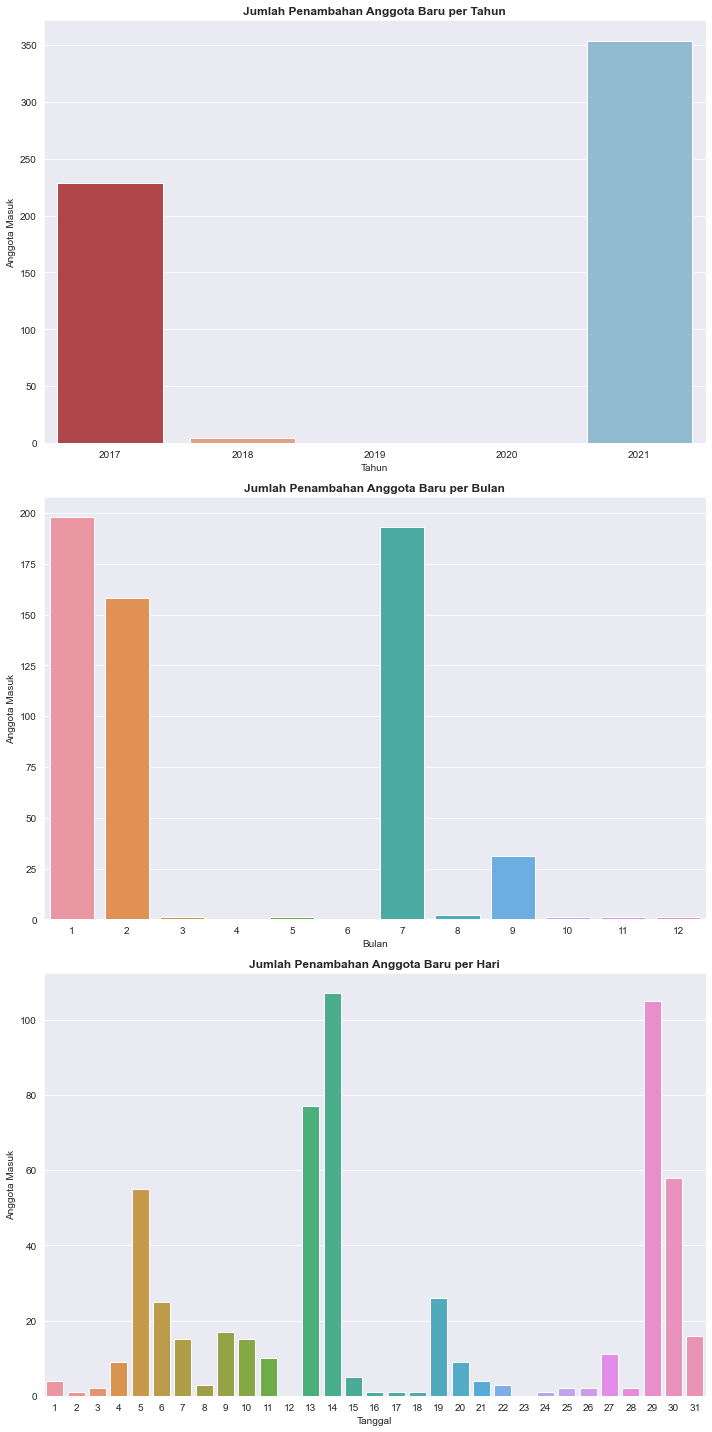

In [21]:
# plot count pertambahan anggota
sns.set_style('darkgrid')
sns.set_palette('RdBu')

plt.figure(figsize=(10, 20))

# pertambahan anggota per tahun secara kumulatif
plt.subplot(3, 1, 1)
sns.barplot(
    y = date_completer(df_service.date.dt.year.value_counts().sort_index())[1],
    x = date_completer(df_service.date.dt.year.value_counts().sort_index())[0],
)
plt.xlabel('Tahun')
plt.ylabel('Anggota Masuk')
plt.title('Jumlah Penambahan Anggota Baru per Tahun', fontweight='bold')

# pertambahan anggota per bulan secara kumulatif
plt.subplot(3, 1, 2)
sns.barplot(
    y = date_completer(df_service.date.dt.month.value_counts().sort_index())[1],
    x = date_completer(df_service.date.dt.month.value_counts().sort_index())[0],
)
plt.xlabel('Bulan')
plt.ylabel('Anggota Masuk')
plt.title('Jumlah Penambahan Anggota Baru per Bulan', fontweight='bold')

# pertambahan anggota per hari secara kumulatif
plt.subplot(3, 1, 3)
sns.barplot(
    y = date_completer(df_service.date.dt.day.value_counts().sort_index())[1],
    x = date_completer(df_service.date.dt.day.value_counts().sort_index())[0],
)
plt.xlabel('Tanggal')
plt.ylabel('Anggota Masuk')
plt.title('Jumlah Penambahan Anggota Baru per Hari', fontweight='bold')

plt.tight_layout()
plt.show()

Pada grafik barplot diatas dapat kita lihat secara kumulatif bagaimana pertambahan anggota grup berdasarkan tahun, bulan, maupun tanggal.

1. Tahun
> Pada grafik tahun, dapat kita lihat ada perbedaan aktifitas pertambahan anggota yang berbeda sangat signifikan antar tahunnya. Tercatat tahun 2017 memiliki pertambahan anggota lebih dari 200 orang dan pada tahun 2021 terdapat pertambahan anggota lebih dari 350 orang. Hasil yang minim terdapat pada tahun 2018 dengan pertambahan anggota hanya 4 orang saja, bahkan pada tahun 2019 dan 2020 tercatat tidak ada pertambahan anggota sama sekali.
2. Bulan
> Pada grafik bulan, terdapat 3 bulan dimana anggota baru banyak masuk yaitu pada bulan Januari, Februari, dan Juli. Pada bulan-bulan tersebut tercatat penambahan anggota bisa mencapai 150 hingga 200 orang. Bulan September tercatat merupakan bulan dengan jumlah pertambahan anggota yang relatif lebih rendah dari bulan diatas yaitu berada pada jumlah sekitar 30 orang. Bulan lainnya memiliki nilai yang relatif sangat kecil yaitu ada pada angka 0 hingga 2 orang saja.
3. Tanggal
> Pada grafik tanggal dapat kita lihat terdapat beberapa tanggal yang memiliki jumlah pertambahan anggota yang relatif lebih banyak dibandingkan tanggal lainnya. Tanggal 14 dan 29 memiliki nilai yang paling besar yaitu lebih dari 100. Tanggal 5, 13, dan 30 memiliki nilai yang cukup besar dengan lebih dari 50 anggota baru berbagung pada grup. Tanggal lainnya relatif lebih kecil dengan tanggal 12 dan 23 yang bahkan tidak terdapat anggota yang bergabung pada hari tersebut.

Berdasarkan hasil diatas maka dapat kita ambil kesimpulan awal bahwa,

> Aktivitas masuk grup merupakan aktivitas yang eventual dan melibatkan anggota yang relatif banyak pada waktu-waktu tertentu saja. Contoh pada tahun 2017 banyaknya anggota yang bergabung merupakan implikasi dari perpindahan grup secara serentak kepada platform Telegram.

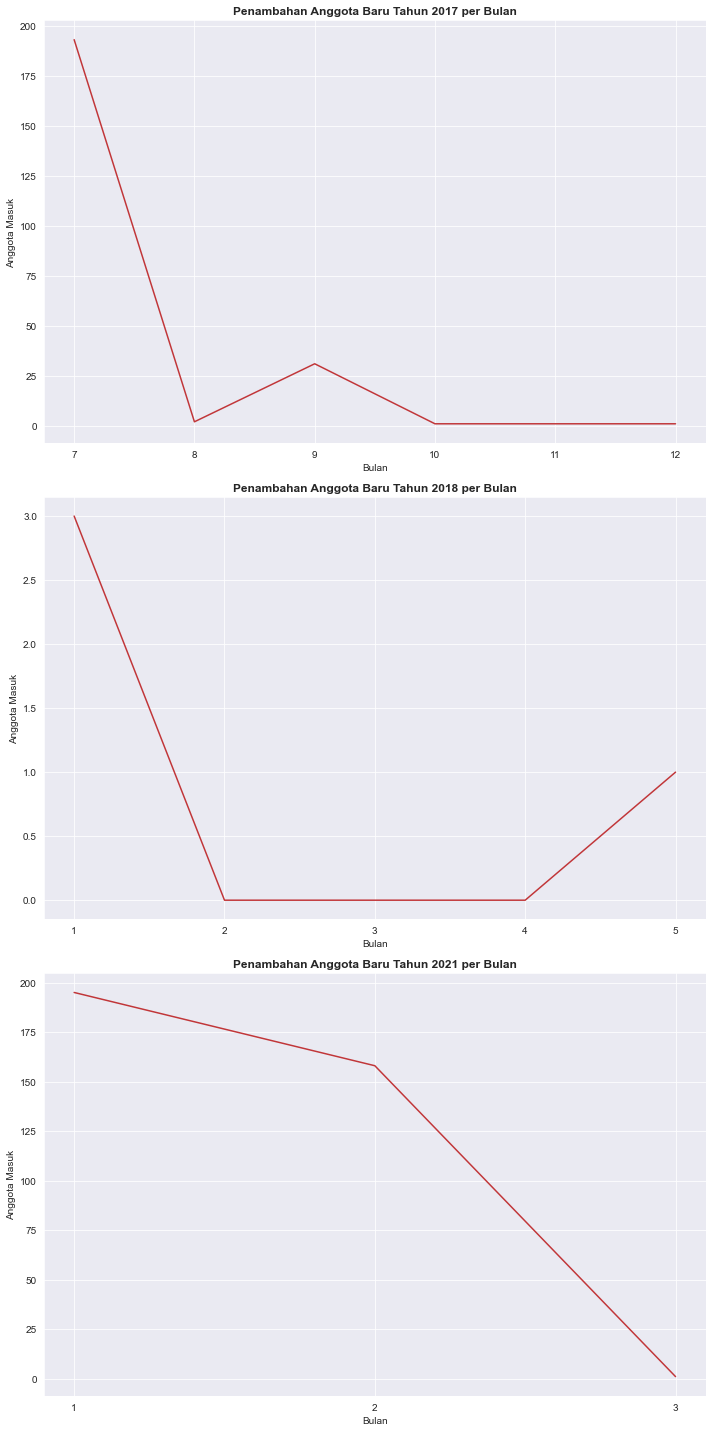

In [22]:
# plot count pertambahan anggota per bulan untuk masing-masing tahun
plt.figure(figsize=(10, 20))

# plot tahun 2017
plt.subplot(3, 1, 1)
plt.plot(
    date_completer(df_service[df_service.date.dt.year == 2017].date.dt.month.value_counts().sort_index())[0],
    date_completer(df_service[df_service.date.dt.year == 2017].date.dt.month.value_counts().sort_index())[1]
)
plt.xticks(range(7, 13))
plt.xlabel('Bulan')
plt.ylabel('Anggota Masuk')
plt.title('Penambahan Anggota Baru Tahun 2017 per Bulan', fontweight='bold')

# plot tahun 2018
plt.subplot(3, 1, 2)
plt.plot(
    date_completer(df_service[df_service.date.dt.year == 2018].date.dt.month.value_counts().sort_index())[0],
    date_completer(df_service[df_service.date.dt.year == 2018].date.dt.month.value_counts().sort_index())[1]
)
plt.xticks(range(1, 6))
plt.xlabel('Bulan')
plt.ylabel('Anggota Masuk')
plt.title('Penambahan Anggota Baru Tahun 2018 per Bulan', fontweight='bold')

# plot tahun 2021
plt.subplot(3, 1, 3)
plt.plot(
    date_completer(df_service[df_service.date.dt.year == 2021].date.dt.month.value_counts().sort_index())[0],
    date_completer(df_service[df_service.date.dt.year == 2021].date.dt.month.value_counts().sort_index())[1]
)
plt.xticks(range(1, 4))
plt.xlabel('Bulan')
plt.ylabel('Anggota Masuk')
plt.title('Penambahan Anggota Baru Tahun 2021 per Bulan', fontweight='bold')

plt.tight_layout()
plt.show()

Pada grafik diatas dapat kita lihat pertambahan anggota per bulan untuk tiap tahunnya. Tahun 2019 dan 2020 tidak terdapat pertambahan anggota sehingga grafik pertambahan anggota tidak dapat dilihat. Pada grafik diatas dapat kita lihat bahwa pertambahan anggota terjadi dengan sangat tinggi pada tahun 2017 bulan Juli dan tahun 2021 pada bulan Januari dan Februari. Hasil diatas menguatkan dugaan bahwa pertambahan anggota merupakan aktitas eventual yang melibatkan banyak orang. Pada masing-masing grafik juga dapat kita lihat bahwa pertambahan anggota per tahunnya relatif menurun seiring bertambahnya bulan.

In [23]:
# fungsi untuk mapping jam menjadi kategori pagi, siang, sore, dan malam
def hour_map():
    pagi = 0
    siang = 0
    sore = 0
    malam = 0
    for key, value in df_service.date.dt.hour.value_counts().items():
        if key > 4 and key <= 10:
            pagi += value
        elif key > 10 and key <= 14:
            siang += value
        elif key > 14 and key <= 18:
            sore += value
        else:
            malam += value
    return ['pagi', 'siang', 'sore', 'malam'], [pagi, siang, sore, malam]

Text(0.5, 1.0, 'Persentase Penambahan Anggota Baru per Jam')

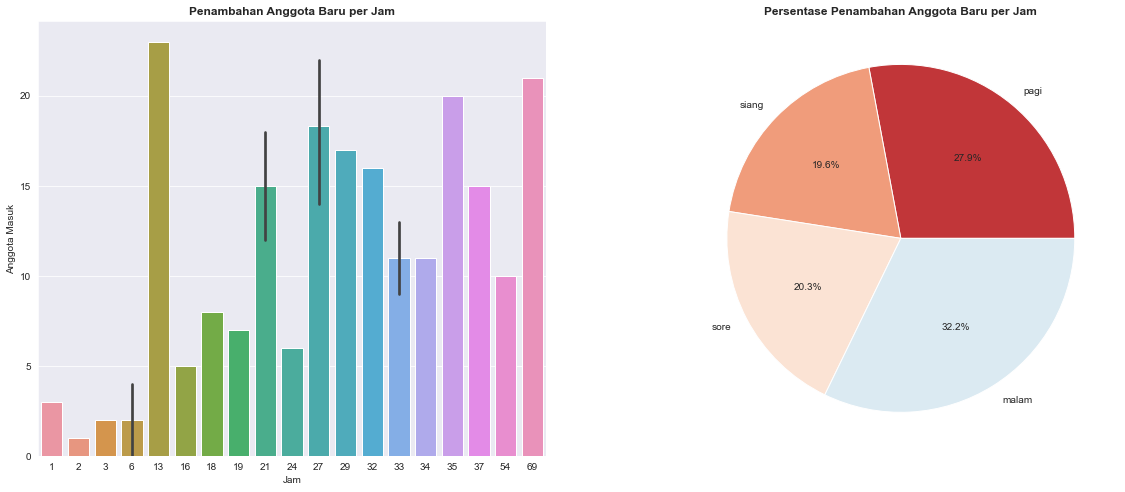

In [24]:
# plot pertambahan anggota kumulatif per jam
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(
    y = date_completer(df_service.date.dt.hour.value_counts().sort_index())[0],
    x = date_completer(df_service.date.dt.hour.value_counts().sort_index())[1]
)
plt.xlabel('Jam')
plt.ylabel('Anggota Masuk')
plt.title('Penambahan Anggota Baru per Jam', fontweight='bold')

# plot persentase pertambahan anggota per kategori waktu
plt.subplot(1, 2, 2)
plt.pie(
    hour_map()[1],
    labels = hour_map()[0],
    autopct='%1.1f%%'
)
plt.title('Persentase Penambahan Anggota Baru per Jam', fontweight='bold')

Grafik diatas menunjukan kecenderungan jam dimana anggota baru masuk pada grup. Sepintas dapat dilihat pada barplot bahwa ada waktu-waktu yang dominan dimana anggota baru masuk kepada grup, namun apa bila kita coba lakukan binning kepada jam-jam yang ada yaitu:

- jam 4 hingga 10 untuk waktu pagi,
- jam 10 hingga 14 untuk waktu siang,
- jam 14 hingga 18 untuk waktu malam,
- dan jam 18 hingga 4 untuk waktu malam

maka aktivitas masuk grup tidak memiliki kecenderungan tertentu kepada suatu kategori waktu. Pada masing-masing kategori, persentase aktivitas masuk grupnya berada pada sekitar nilai 20 hingga 30 persen.

### Central Tendency Kuantitas Chat

In [25]:
df_message = df[df['1'] == 'message']
df_message

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
12,13,message,2017-07-13T21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None
14,15,message,2017-07-13T21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None
20,21,message,2017-07-13T21:12:28,😈sauqi,4456442332,"Ricky Sauqi, IF98",None,None,None,None,None,None,None,None
24,25,message,2017-07-13T21:14:56,Yohanes Nugroho,4319879606,Yohanes IF98,None,None,None,None,None,None,None,None
27,28,message,2017-07-13T21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,4982,message,2021-03-10T21:57:09,ady wicaksono,4305086899,4980,migrasi ke mana om? ke google cloud (nanti ram...,None,None,None,None,None,None,None
4928,4983,message,2021-03-10T21:58:05,Cahyoga,4296690714,Dari web mas Kribo ke IA,None,None,None,None,None,None,None,None
4929,4984,message,2021-03-10T22:05:33,ady wicaksono,4305086899,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,application/pdf,trial dulu... migrasi dari web mas Kribo ke Te...,None,None,None,None,None
4930,4985,message,2021-03-11T15:41:28,Bang Ribay,4338855063,4940,"Tau gini, lionel messi bakal mining bitcoin..",None,None,None,None,None,None,None


In [26]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 12 to 4931
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4323 non-null   int64 
 1   1       4323 non-null   object
 2   2       4323 non-null   object
 3   3       4095 non-null   object
 4   4       4321 non-null   object
 5   5       4322 non-null   object
 6   6       1755 non-null   object
 7   7       256 non-null    object
 8   8       216 non-null    object
 9   9       94 non-null     object
 10  10      61 non-null     object
 11  11      58 non-null     object
 12  12      30 non-null     object
 13  13      2 non-null      object
dtypes: int64(1), object(13)
memory usage: 506.6+ KB


In [27]:
df_message['2'] = pd.to_datetime(df_message['2'])

C:\Users\Vicqy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 12 to 4931
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       4323 non-null   int64         
 1   1       4323 non-null   object        
 2   2       4323 non-null   datetime64[ns]
 3   3       4095 non-null   object        
 4   4       4321 non-null   object        
 5   5       4322 non-null   object        
 6   6       1755 non-null   object        
 7   7       256 non-null    object        
 8   8       216 non-null    object        
 9   9       94 non-null     object        
 10  10      61 non-null     object        
 11  11      58 non-null     object        
 12  12      30 non-null     object        
 13  13      2 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 506.6+ KB


In [29]:
df_message

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
12,13,message,2017-07-13 21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None
14,15,message,2017-07-13 21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None
20,21,message,2017-07-13 21:12:28,😈sauqi,4456442332,"Ricky Sauqi, IF98",None,None,None,None,None,None,None,None
24,25,message,2017-07-13 21:14:56,Yohanes Nugroho,4319879606,Yohanes IF98,None,None,None,None,None,None,None,None
27,28,message,2017-07-13 21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,4982,message,2021-03-10 21:57:09,ady wicaksono,4305086899,4980,migrasi ke mana om? ke google cloud (nanti ram...,None,None,None,None,None,None,None
4928,4983,message,2021-03-10 21:58:05,Cahyoga,4296690714,Dari web mas Kribo ke IA,None,None,None,None,None,None,None,None
4929,4984,message,2021-03-10 22:05:33,ady wicaksono,4305086899,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,application/pdf,trial dulu... migrasi dari web mas Kribo ke Te...,None,None,None,None,None
4930,4985,message,2021-03-11 15:41:28,Bang Ribay,4338855063,4940,"Tau gini, lionel messi bakal mining bitcoin..",None,None,None,None,None,None,None


In [30]:
# fungsi untuk mengekstrak tanggal dari chat
def date_group():
    str_list = []
    for date in df_message['2']:
        date_str = ''
        date_str = date_str + str(date.year) + str(date.month) + str(date.day)
        str_list.append(date_str)
    return str_list

In [31]:
pd.Series(date_group()).value_counts().values

array([219, 216, 208, 188, 167, 139, 115,  98,  96,  95,  95,  92,  78,
        68,  64,  62,  62,  61,  59,  57,  57,  56,  56,  54,  50,  50,
        49,  48,  48,  45,  42,  42,  41,  39,  39,  39,  37,  36,  35,
        35,  34,  32,  31,  30,  30,  29,  29,  29,  26,  25,  25,  24,
        22,  21,  21,  21,  21,  20,  19,  19,  18,  18,  18,  17,  16,
        16,  16,  16,  14,  14,  14,  13,  13,  13,  12,  12,  12,  11,
        11,  11,  11,  11,  10,  10,  10,   9,   9,   9,   9,   9,   9,
         8,   8,   8,   8,   7,   7,   7,   7,   7,   7,   7,   6,   6,
         6,   6,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,
         4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [32]:
def date_binning():
    high = 0
    mid = 0
    low = 0
    for value in pd.Series(date_group()).value_counts().values:
        if value > 100:
            high += 1
        elif value <= 100 and value > 50:
            mid += 1
        else:
            low += 1
    return ['>100', '100>=chat>50', '<=50'], [high, mid, low]

Text(0.5, 1.0, 'Banyak Chat per Hari Berdasarkan Kategori')

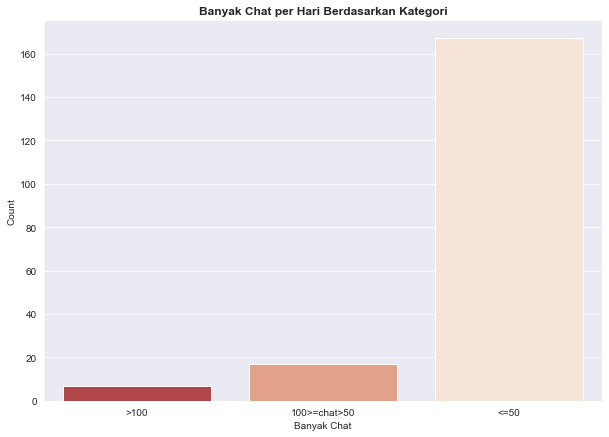

In [33]:
plt.figure(figsize=(10, 7))
sns.barplot(
    y = date_binning()[1],
    x = date_binning()[0],
)
plt.xlabel('Banyak Chat')
plt.ylabel('Count')
plt.title('Banyak Chat per Hari Berdasarkan Kategori', fontweight='bold')

Jumlah message yang ada per hari pada grup IAIF ITB ini sangat bervariasi, dari paling minimum terdapat 1 chat hingga paling maksimum mencapai sekitar 200 chat. Jika kita lakukan binning dengan 3 kategori yaitu banyak (lebih dari 100), sedang (antara 50 dan 100), dan sedikit (dibawah 50) seperti pada grafik diatas bisa kita lihat bahwa kategori banyak dan sedang memiliki nilai yang rendah yaitu dibawah 20 hari. Sementara pada kategori sedikit dapat kita lihat memiliki nilai yang sangat tinggi yaitu melebihi 150 hari. Grafik diatas mengindikasikan bahwa aktivitas chatting yang dilakukan pada grup ini bersifat eventual dan bukan merupakan suatu rutinitas (bukan grup yang "hidup"). Untuk mengetahui secara lebih lanjut akan kita lihat bagaimana central tendencynya dengan menggunakan "mean" dan "median" sebagai berikut.

In [34]:
print('total chat         :', np.sum(pd.Series(date_group()).value_counts().values))
print('rata-rata per hari :', np.mean(pd.Series(date_group()).value_counts().values))
print('median per hari    :', np.median(pd.Series(date_group()).value_counts().values))
print('standar deviasi    :', np.std(pd.Series(date_group()).value_counts().values))

total chat         : 4323
rata-rata per hari : 22.63350785340314
median per hari    : 7.0
standar deviasi    : 37.961564024580795


In [35]:
pd.Series(date_group()).value_counts().describe()

count    191.000000
mean      22.633508
std       38.061332
min        1.000000
25%        2.000000
50%        7.000000
75%       27.500000
max      219.000000
dtype: float64

Berdasarkan metric central tendency diatas, bisa kita lihat terdapat perbedaan yang cukup besar antara "rata-rata" jumlah chat perhari dan "median" jumlah chat perhari dengan nilai 22,6 dan 7,0. Hal ini mengindikasikan adanya "right-skew" pada distribusi dari banyak chat per hari.

Keberadaan nilai extreme pada data yaitu jumlah chat perhari yang mencapai ratusan ini menyebabkan rata-ratanya menjadi naik dan tidak representatif terhadap kondisi aktual data. Median yang dapat kita gunakan sebagai ukuran central tendency ini memberikan kita informasi bahwa tiap harinya selama 5 tahun pada grup terdapat 7 message saja. Secara kualitatif grup ini bisa dibilang "tidak hidup". Untuk mendukung dugaan ini dapat kita lihat informasi pendukung yaitu berapa banyak rata-rata orang yang berpartisipasi dalam percakapan tiap harinya.

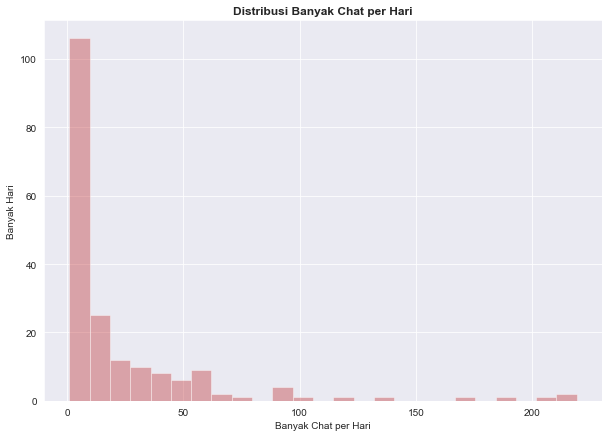

In [36]:
plt.figure(figsize=(10, 7))
sns.distplot(pd.Series(date_group()).value_counts().values, kde=False)
plt.xlabel('Banyak Chat per Hari')
plt.ylabel('Banyak Hari')
plt.title('Distribusi Banyak Chat per Hari', fontweight='bold')
plt.show()

In [37]:
pd.Series(date_group()).value_counts()

2017714    219
2021221    216
202134     208
2021217    188
2017911    167
          ... 
2018829      1
2018528      1
2017109      1
2020116      1
2018626      1
Length: 191, dtype: int64

In [38]:
# fungsi untuk mengekstrak tanggal up to hari dari chat
def day_group():
    str_list = []
    for date in df_message['2']:
        date_str = ''
        date_str = date_str + str(date.year) + '-' + str(date.month) + '-' + str(date.day)
        str_list.append(date_str)
    return str_list

In [39]:
df_message['year_month_day'] = pd.to_datetime(day_group())
df_message

C:\Users\Vicqy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,year_month_day
12,13,message,2017-07-13 21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None,2017-07-13
14,15,message,2017-07-13 21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None,2017-07-13
20,21,message,2017-07-13 21:12:28,😈sauqi,4456442332,"Ricky Sauqi, IF98",None,None,None,None,None,None,None,None,2017-07-13
24,25,message,2017-07-13 21:14:56,Yohanes Nugroho,4319879606,Yohanes IF98,None,None,None,None,None,None,None,None,2017-07-13
27,28,message,2017-07-13 21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None,2017-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,4982,message,2021-03-10 21:57:09,ady wicaksono,4305086899,4980,migrasi ke mana om? ke google cloud (nanti ram...,None,None,None,None,None,None,None,2021-03-10
4928,4983,message,2021-03-10 21:58:05,Cahyoga,4296690714,Dari web mas Kribo ke IA,None,None,None,None,None,None,None,None,2021-03-10
4929,4984,message,2021-03-10 22:05:33,ady wicaksono,4305086899,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,application/pdf,trial dulu... migrasi dari web mas Kribo ke Te...,None,None,None,None,None,2021-03-10
4930,4985,message,2021-03-11 15:41:28,Bang Ribay,4338855063,4940,"Tau gini, lionel messi bakal mining bitcoin..",None,None,None,None,None,None,None,2021-03-11


In [40]:
df_message.groupby('year_month_day')['4'].nunique().sort_index()

year_month_day
2017-07-13     54
2017-07-14    100
2017-07-15     20
2017-07-16      8
2017-07-18      8
             ... 
2021-03-08      6
2021-03-09      2
2021-03-10     15
2021-03-11      1
2021-03-12      1
Name: 4, Length: 192, dtype: int64

In [41]:
df_message.groupby('year_month_day')['4'].nunique().sort_index().describe()

count    192.00000
mean       6.87500
std        9.82544
min        1.00000
25%        2.00000
50%        4.00000
75%        9.00000
max      100.00000
Name: 4, dtype: float64

Dari informasi diatas dapat kita lihat bahwa rata-rata dan median banyak orang yang berpartisipasi setiap harinya dalam suatu chat adalah sekitar 7 dan 4 orang. Dengan informasi tambahan sebelumnya bahwa median chat perharinya adalah 7, maka dugaan bahwa grup relatif "tidak hidup" / komunikasi hanya bersifat eventual dapat dijustifikasi. Kedua nilai ini mengindikasikan bahwa tiap harinya terdapat hanya 7 orang yang masing-masing menulis 1 message saja. 

### Partisipansi Anggota Grup per Bulan

In [42]:
# fungsi untuk mengekstrak tanggal up to bulan dari chat
def month_group():
    str_list = []
    for date in df_message['2']:
        date_str = ''
        date_str = date_str + str(date.year) + '-' + str(date.month)
        str_list.append(date_str)
    return str_list

In [43]:
df_message['year_month'] = pd.to_datetime(month_group())
df_message

C:\Users\Vicqy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,year_month_day,year_month
12,13,message,2017-07-13 21:09:34,None,4547722562,Terima kasih undangannya Pak Hariyono,None,None,None,None,None,None,None,None,2017-07-13,2017-07-01
14,15,message,2017-07-13 21:10:14,None,4547722562,Ijin memperkenalkan diri. Wirawan Firman Nurca...,None,None,None,None,None,None,None,None,2017-07-13,2017-07-01
20,21,message,2017-07-13 21:12:28,😈sauqi,4456442332,"Ricky Sauqi, IF98",None,None,None,None,None,None,None,None,2017-07-13,2017-07-01
24,25,message,2017-07-13 21:14:56,Yohanes Nugroho,4319879606,Yohanes IF98,None,None,None,None,None,None,None,None,2017-07-13,2017-07-01
27,28,message,2017-07-13 21:16:20,None,4623753173,"Salam kenal, T. Reza IF07",None,None,None,None,None,None,None,None,2017-07-13,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,4982,message,2021-03-10 21:57:09,ady wicaksono,4305086899,4980,migrasi ke mana om? ke google cloud (nanti ram...,None,None,None,None,None,None,None,2021-03-10,2021-03-01
4928,4983,message,2021-03-10 21:58:05,Cahyoga,4296690714,Dari web mas Kribo ke IA,None,None,None,None,None,None,None,None,2021-03-10,2021-03-01
4929,4984,message,2021-03-10 22:05:33,ady wicaksono,4305086899,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,application/pdf,trial dulu... migrasi dari web mas Kribo ke Te...,None,None,None,None,None,2021-03-10,2021-03-01
4930,4985,message,2021-03-11 15:41:28,Bang Ribay,4338855063,4940,"Tau gini, lionel messi bakal mining bitcoin..",None,None,None,None,None,None,None,2021-03-11,2021-03-01


In [44]:
df_message.groupby('year_month')['4'].nunique().sort_index()

year_month
2017-07-01    152
2017-08-01     20
2017-09-01     62
2017-10-01     26
2017-11-01     21
2017-12-01      9
2018-01-01     28
2018-02-01      7
2018-03-01      4
2018-04-01      7
2018-05-01      5
2018-06-01     11
2018-07-01      6
2018-08-01      1
2018-09-01      3
2019-02-01      2
2019-04-01      1
2019-05-01      2
2019-11-01      2
2020-01-01     15
2020-02-01      4
2020-04-01      2
2020-07-01     15
2020-08-01      6
2020-10-01      3
2020-11-01      1
2020-12-01      7
2021-01-01     45
2021-02-01     85
2021-03-01     41
Name: 4, dtype: int64

In [45]:
# fungsi untuk melengkapi count kosong pada bulan untuk dataframe message
def date_completer_message(date):
    index = []
    value = []
    year_count = np.min(date.index.month)
    for year, count in date.items():
        if year_count == year.month:
            index.append(int(year.month))
            value.append(int(count))
            year_count += 1
        else:
            while year_count < year.month:
                index.append(int(year_count))
                value.append(0)
                year_count += 1
            index.append(int(year.month))
            value.append(int(count))
            year_count += 1
    return index, value

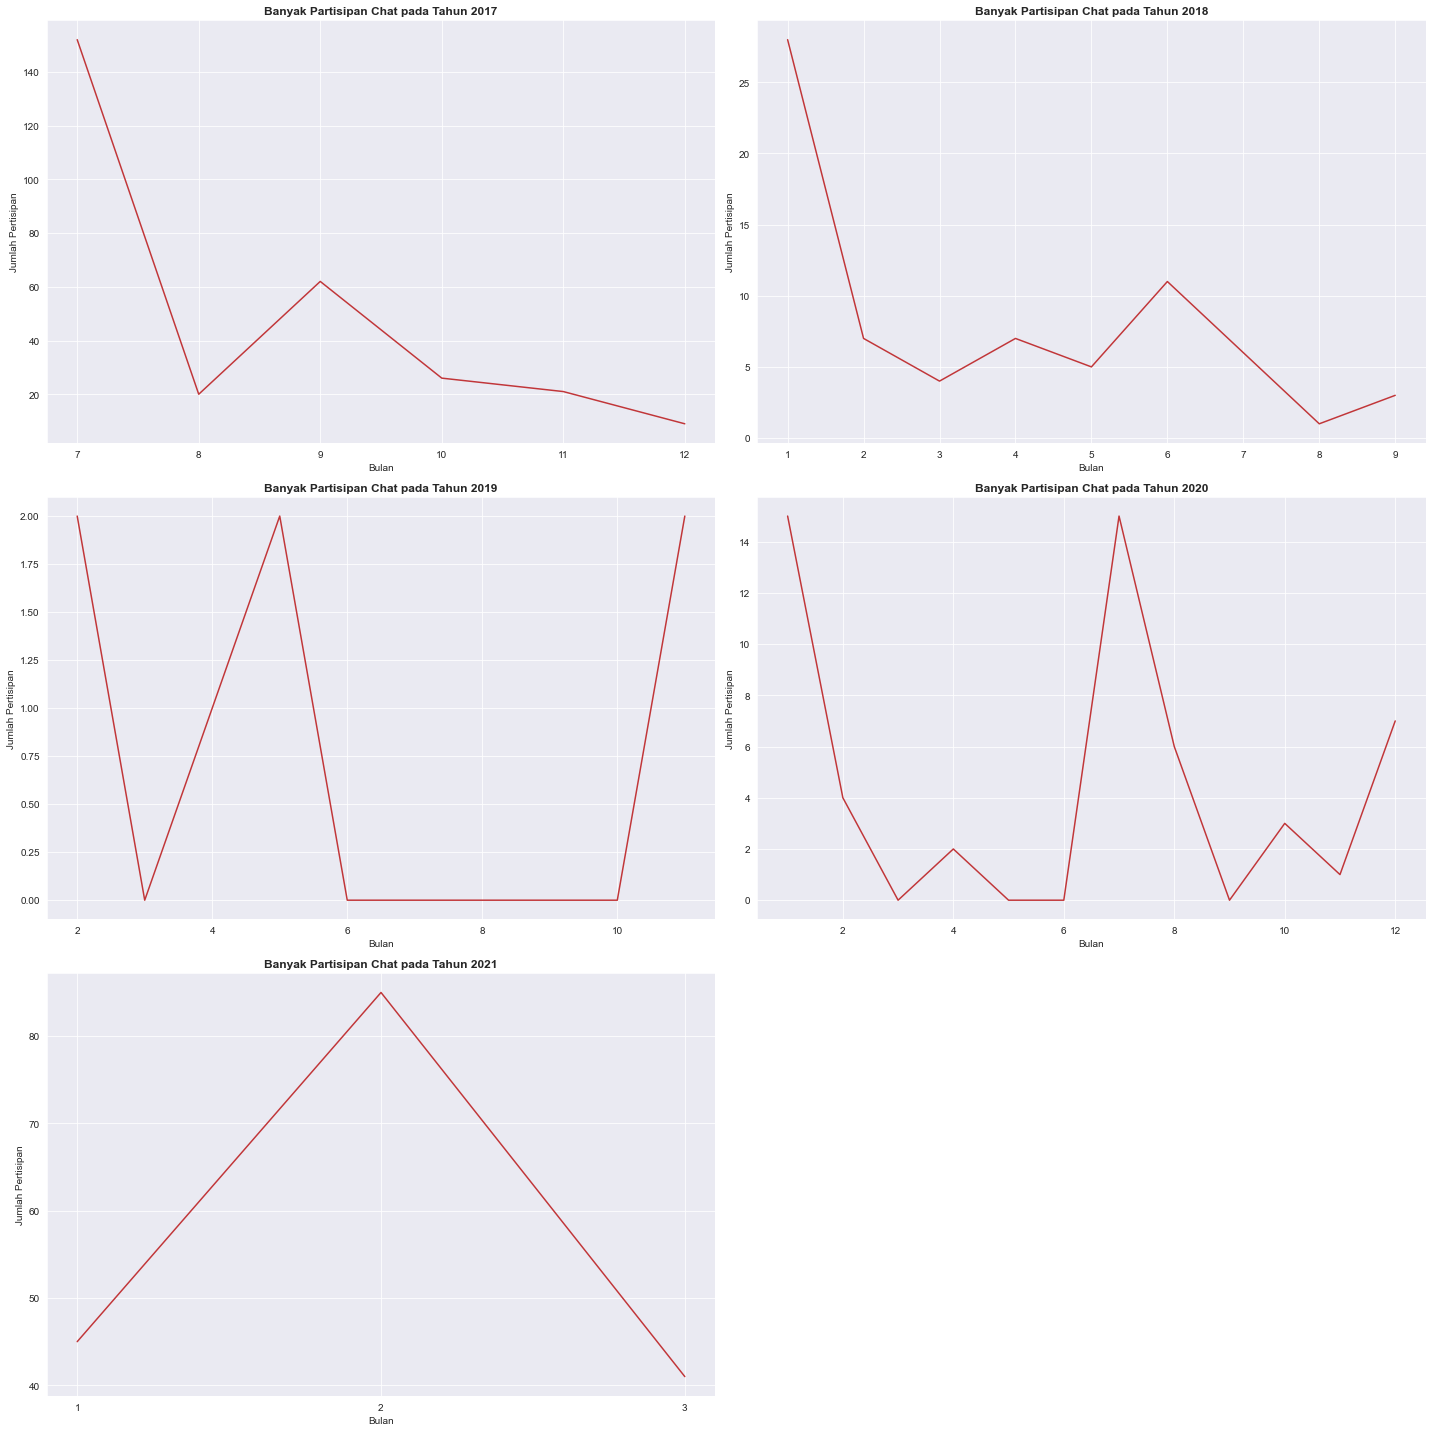

In [46]:
# plot count pertambahan anggota per bulan untuk masing-masing tahun
plt.figure(figsize=(20, 20))

# plot tahun 2017
plt.subplot(3, 2, 1)
plt.plot(
    date_completer_message(df_message[df_message['2'].dt.year == 2017].groupby('year_month')['4'].nunique().sort_index())[0],
    date_completer_message(df_message[df_message['2'].dt.year == 2017].groupby('year_month')['4'].nunique().sort_index())[1]
)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pertisipan')
plt.title('Banyak Partisipan Chat pada Tahun 2017', fontweight='bold')

# plot tahun 2018
plt.subplot(3, 2, 2)
plt.plot(
    date_completer_message(df_message[df_message['2'].dt.year == 2018].groupby('year_month')['4'].nunique().sort_index())[0],
    date_completer_message(df_message[df_message['2'].dt.year == 2018].groupby('year_month')['4'].nunique().sort_index())[1])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pertisipan')
plt.title('Banyak Partisipan Chat pada Tahun 2018', fontweight='bold')

# plot tahun 2019
plt.subplot(3, 2, 3)
plt.plot(
    date_completer_message(df_message[df_message['2'].dt.year == 2019].groupby('year_month')['4'].nunique().sort_index())[0],
    date_completer_message(df_message[df_message['2'].dt.year == 2019].groupby('year_month')['4'].nunique().sort_index())[1]
)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pertisipan')
plt.title('Banyak Partisipan Chat pada Tahun 2019', fontweight='bold')

# plot tahun 2020
plt.subplot(3, 2, 4)
plt.plot(
    date_completer_message(df_message[df_message['2'].dt.year == 2020].groupby('year_month')['4'].nunique().sort_index())[0],
    date_completer_message(df_message[df_message['2'].dt.year == 2020].groupby('year_month')['4'].nunique().sort_index())[1]
)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pertisipan')
plt.title('Banyak Partisipan Chat pada Tahun 2020', fontweight='bold')

# plot tahun 2021
plt.subplot(3, 2, 5)
plt.plot(
    date_completer_message(df_message[df_message['2'].dt.year == 2021].groupby('year_month')['4'].nunique().sort_index())[0],
    date_completer_message(df_message[df_message['2'].dt.year == 2021].groupby('year_month')['4'].nunique().sort_index())[1]
)
plt.xticks(range(1, 4))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pertisipan')
plt.title('Banyak Partisipan Chat pada Tahun 2021', fontweight='bold')

plt.tight_layout()
plt.show()

Pada grafik diatas dapat kita lihat pergerakan dan juga banyak partisipan chat untuk tiap taunnya per bulan.
- Aktifitas yang rendah dapat kita lihat pada tahun 2019 dengan bulan Maret, Mei, dan Desember hanya sebanyak 2 partisipan saja.
- Tahun 2017 realtif memiliki banyak partisipan, hal ini diduga karena aktivitas migrasi grup dengan ditandainya saling berkenalan antar anggota yang masuk kepada grup.
- Pada tahun 2018 intensitas komunikasi menjadi semakin berkurang dibandingkan dengan tahun 2017.
- Tahun 2020 terjadi komunikasi yang minor yaitu pada bulan Januari dan Juli.
- Partisipansi kembali meningkat pada tahun 2021 yang memuncak pada bulan Februari.